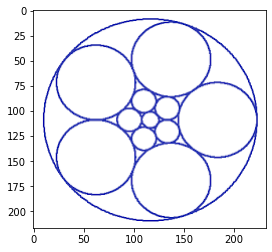

In [14]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img_path="image.png"
img= cv.imread(img_path)
plt.imshow(img)

-1

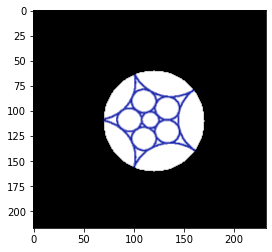

In [15]:
mask = np.zeros(img.shape[:2], dtype="uint8")
 
# creating a circle on the mask
# where the pixels are valued at 255
cv.circle(mask, (120, 110), 50, 255, -1)
plt.imshow(mask)
 
# performing a bitwise_and with the image and the mask
masked = cv.bitwise_and(img, img, mask=mask)
plt.imshow( masked)
cv.waitKey(0)

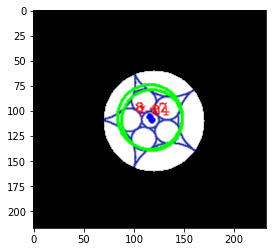

In [17]:
gray = cv.cvtColor(masked, cv.COLOR_BGR2GRAY)
#blur = cv.GaussianBlur(gray, (9,9),0)
minDist = 100
param1 = 100 #500
param2 = 50 #200 
minRadius = 10
maxRadius = 100 #10
    
circles = cv.HoughCircles(gray, cv.HOUGH_GRADIENT, 1.2, minDist, param1=param1, param2=param2, minRadius=minRadius, maxRadius=maxRadius)
if circles is not None:
    circles = np.uint16(np.around(circles))
        #count=1
    for i in circles[0,:]:
        r_mm=np.round(i[2]*0.2645833 , 2)
            #print('r'+str(i)+' '+str(r_mm))
        cv.circle(masked, (i[0], i[1]), i[2], (0, 255, 0), 2) 
        cv.circle(masked, (i[0], i[1]), 2, (0,0,255), 2 ) 
        cv.putText(masked, str(r_mm),(i[0]-15, i[1]-5), cv.FONT_HERSHEY_COMPLEX_SMALL, 0.7, (255,0,0), 1)
         # print('r' + str(count)+ ' ' +str(r_mm))
           # count+=1
    plt.imshow(masked)
   
    